## Task 1: Data Preprocessing with scikit-learn

**Objective**

Clean and preprocess a dataset for shipment times and routes.

**Instructions**
1. Load the dataset from a CSV file.
2. Handle missing values appropriately.
3. Encode categorical variables.
4. Normalize numerical features.

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import random


# 1. Python built-in RNG
random.seed(30)

# 2. NumPy RNG
np.random.seed(30)

# 3. PyTorch CPU RNG
torch.manual_seed(30)

# 4. PyTorch GPU RNG (if using CUDA)
torch.cuda.manual_seed_all(30)

# 5. Force deterministic CUDA (optional, may slow you down)
torch.use_deterministic_algorithms(True)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
ShipData = pd.read_csv("ShipmentData.csv") #This was an original supply chain data from Kaggle
# I had the dataset Extrapolated to 25k+ records by filling in likely future (or past) values based on patterns observed with an addition of a distance column.

#### This was an original supply chain data from Kaggle.  I had the dataset Extrapolated to 25k+ records by filling in likely future (or past) values based on patterns observed with an addition of a distance column for future deep learning works.

In [5]:
print(ShipData.shape)
ShipData.head(5)

(25000, 25)


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Distance (km)
0,skincare,SKU0,69.02,0,254,19937.77,Unknown,94,25,92,3,Carrier B,674.73,Supplier 5,Mumbai,11,739,24,1.97,Fail,2.73,Air,Route B,413.86,1016
1,haircare,SKU1,96.01,18,510,52220.92,Male,84,17,42,4,Carrier C,247.07,Supplier 1,Mumbai,22,293,21,62.02,Pending,0.79,Rail,Route C,490.68,967
2,cosmetics,SKU2,26.60,62,177,5081.47,Male,90,4,51,3,Carrier A,663.83,Supplier 5,Mumbai,11,86,29,11.98,Pass,3.42,Air,Route A,867.51,1011
3,cosmetics,SKU3,76.59,68,195,17142.99,Unknown,90,4,22,4,Carrier A,268.11,Supplier 4,Chennai,29,914,26,23.99,Pending,4.80,Rail,Route A,600.23,1039
4,haircare,SKU4,89.51,1,281,27986.87,Male,11,26,40,7,Carrier A,162.01,Supplier 5,Kolkata,12,838,23,72.95,Fail,2.21,Sea,Route B,105.88,1058


In [6]:
ShipData.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

In [7]:
ShipData.isnull().sum()

product_type               0
sku                        0
price                      0
availability               0
number_of_products_sold    0
revenue_generated          0
customer_demographics      0
stock_levels               0
lead_times                 0
order_quantities           0
shipping_times             0
shipping_carriers          0
shipping_costs             0
supplier_name              0
location                   0
lead_time                  0
production_volumes         0
manufacturing_lead_time    0
manufacturing_costs        0
inspection_results         0
defect_rates               0
transportation_modes       0
routes                     0
costs                      0
distance_(km)              0
dtype: int64

In [8]:
ShipData.duplicated().value_counts()

False    25000
Name: count, dtype: int64

In [9]:
ShipData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             25000 non-null  object 
 1   sku                      25000 non-null  object 
 2   price                    25000 non-null  float64
 3   availability             25000 non-null  int64  
 4   number_of_products_sold  25000 non-null  int64  
 5   revenue_generated        25000 non-null  float64
 6   customer_demographics    25000 non-null  object 
 7   stock_levels             25000 non-null  int64  
 8   lead_times               25000 non-null  int64  
 9   order_quantities         25000 non-null  int64  
 10  shipping_times           25000 non-null  int64  
 11  shipping_carriers        25000 non-null  object 
 12  shipping_costs           25000 non-null  float64
 13  supplier_name            25000 non-null  object 
 14  location              

In [217]:
ShipData.head(2)

NameError: name 'ShipData' is not defined

In [20]:
#Selecting the needed features from main df. ('needed' as specified in the task instruction)
shipment_df = ShipData[['routes', 'shipping_times', 'distance_(km)', 'number_of_products_sold', 'transportation_modes', 'location']].copy()

In [22]:
shipment_df = shipment_df.rename(columns={'distance_(km)': 'distance(km)'})

In [24]:
shipment_df.head(0)

,routes,shipping_times,distance(km),number_of_products_sold,transportation_modes,location


In [26]:
shipment_df['transportation_modes'].unique()

array(['Air', 'Rail', 'Sea', 'Road'], dtype=object)

In [28]:
#pd.get_dummies(shipment_df['transportation_modes'], drop_first=True)
#pd.get_dummies(shipment_df['location'], drop_first=True)
shipment_df = pd.get_dummies(shipment_df, columns=['transportation_modes', 'location', 'routes'], drop_first=True).astype('int64')

In [30]:
shipment_df.head(2)

,shipping_times,distance(km),number_of_products_sold,transportation_modes_Rail,transportation_modes_Road,transportation_modes_Sea,location_Chennai,location_Delhi,location_Kolkata,location_Mumbai,routes_Route B,routes_Route C
0,3,1016,254,0,0,0,0,0,0,1,1,0
1,4,967,510,1,0,0,0,0,0,1,0,1


In [49]:
# Normalize numerical features


# 1) Identify your target(s) and features
target_col = 'shipping_times'
feature_df = shipment_df.drop(columns=[target_col])

# 2) Select only the numeric columns in your features
num_cols = feature_df.select_dtypes(include=['int64', 'float64']).columns
#    (this will pick up your distance, count, and one-hot dummy columns too)

# 3) Fit & transform only those numeric columns
scaler = StandardScaler()
feature_df[num_cols] = scaler.fit_transform(feature_df[num_cols])
feature_df.head(3)
# 4) Now you have:
#    X_scaled = feature_df      (all features, numeric ones scaled)
#    y         = shipment_df[target_col]

shipmentX_scaled = feature_df
shipmenty = shipment_df['shipping_times']


In [36]:
shipmentX_scaled = feature_df
shipmentY = shipment_df[target_col]

In [82]:
shipment_df.head()

,shipping_times,distance(km),number_of_products_sold,shipping_times,distance(km),number_of_products_sold,transportation_modes_Rail,transportation_modes_Road,transportation_modes_Sea,location_Chennai,location_Delhi,location_Kolkata,location_Mumbai,routes_Route B,routes_Route C
0,3,1016,254,3,1016,254,0,0,0,0,0,0,1,1,0
1,4,967,510,4,967,510,1,0,0,0,0,0,1,0,1
2,3,1011,177,3,1011,177,0,0,0,0,0,0,1,0,0
3,4,1039,195,4,1039,195,1,0,0,1,0,0,0,0,0
4,7,1058,281,7,1058,281,0,0,1,0,0,1,0,1,0


## Methods Used for Task 1:

* Loaded dataset with 25 features and 25k records
* Verified no missing values or duplicates
* Selected key features: Routes, Shipping times, Distance
* Encoded categorical 'Routes' with LabelEncoder
* Normalized numerical features with StandardScaler

## Results:

### Sucessfully completed preprocessing with:

* Clean dataset (no missing values/duplicates)
* Normalized column names
* Properly encoded categorical variable
* Appropriately scaled numerical features

## Possible Improvement(s):

* Implement ColumnTransformer for unified preprocessing pipeline
* Add feature correlation analysis before selection
* Use OneHotEncoder instead of LabelEncoder for nominal data

## Task 2:  Model Training with scikit-learn

**Objective**

Train a machine learning model to predict shipment times.

**Instructions**

1. Split the dataset into training and testing sets.
2. Train a regression model.
3. Evaluate the model's performance.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# Split the dataset

#y = shipment_df['shipping_times']
shipmentX_train, shipmentX_test, shipmenty_train, shipmenty_test = train_test_split(shipmentX_scaled, shipmentY, test_size=0.25, random_state=30)
# Train the Lineqar model
shipmentLinear_model = LinearRegression()
shipmentLinear_model.fit(shipmentX_train, shipmenty_train)
shipmentlinear_y_pred = shipmentLinear_model.predict(shipmentX_test)
shipment_linear_mse = mean_squared_error(shipmenty_test, shipmentlinear_y_pred)
#Random Forest model
shipmentforest_model = RandomForestRegressor()
shipmentforest_model.fit(shipmentX_train, shipmenty_train)
shipmentforest_y_pred = shipmentforest_model.predict(shipmentX_test)
shipment_forest_mse = mean_squared_error(shipmenty_test, shipmentforest_y_pred)
# SVR model
shipmentsvr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
shipmentsvr_model.fit(shipmentX_train, shipmenty_train)
shipmenty_pred_svr = shipmentsvr_model.predict(shipmentX_test)
shipment_mse_svr = mean_squared_error(shipmenty_test, shipmenty_pred_svr)

# Evaluate the model
print(f'Linear MSE: {shipment_linear_mse}')
print(f'Random Forest MSE: {shipment_forest_mse}')
print(f'SVR MSE: {shipment_mse_svr}')

Linear MSE: 0.7589074944754644
Random Forest MSE: 0.2830841576577778
SVR MSE: 0.35177383822243125


## Methods Used for Task 2:

* SPlit data (75% train, 25% test)
* Trained LinearRegression, RandomForestRegressor, and SVR model
* Evaluated with their each model's MSE

## Results: Random Forest achieved MSE: 0.283

### Strong performance achieved:

* Random Forest Regressor achieved the lowest error (MSE = 0.2831), indicating it best captures complex interactions.
* SVR followed with moderate error (MSE = 0.3518), showing some non-linear patterns learned.
* Linear Regression had the highest error (MSE = 0.7589), suggesting it underfits non-linear relationships.

* #### The low MSE for Random Forest reflects a high level of predictive accuracy.

## Possible methods for improvement:

* I strongly believe the selected features are impacting the results more than the algorithms.
* Random Forest model's performance improve with better feature selection
* I may try polynomial features for non-linear relationship.
* Use cross-validation for more reliable metrics.

In [42]:
from lightgbm import LGBMRegressor

shipmentlgbm_model = LGBMRegressor(n_estimators=5, learning_rate=0.6, max_depth=7, random_state=32)
shipmentlgbm_model.fit(shipmentshipmentX_train, shipmenty_train)
shipmenty_pred_lgbm = shipmentlgbm_model.predict(X_test)

shipment_mse_lgbm = mean_squared_error(shipmenty_test, shipmenty_pred_lgbm)
print(f'LightGBM MSE: {shipment_mse_lgbm}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 537
[LightGBM] [Info] Number of data points in the train set: 18750, number of used features: 11
[LightGBM] [Info] Start training from score 3.298827
LightGBM MSE: 0.25328209362607923


In [44]:
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error

shipmentxgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=30)
shipmentxgb_model.fit(shipmentX_train, shipmenty_train)
shipmenty_pred_xgb = shipmentxgb_model.predict(shipmentX_test)

shipment_mse_xgb = mean_squared_error(shipmenty_test, shipmenty_pred_xgb)
print(f'XGBoost MSE: {shipment_mse_xgb}')

XGBoost MSE: 0.25490039587020874


## The GradeintBooster are currently the best performers without hyperparameter tuning on the other models

## Task 3: Neural Network with TensorFlow

**Objective:**

Build a neural network to predict shipment times.

**Instructions**
1. Define a neural network architecture.
2. Train the neural network.
3. Evaluate the model's performance.

In [40]:
import tensorflow as tf
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
# Define the neural network
shipment_nn_model = Sequential([
    Input(shape=(shipmentX_train.shape[1],)), 
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
# Compile the model
shipment_nn_model.compile(optimizer='adam', loss='mse')
# Train the model
shipment_nn_model.fit(shipmentX_train, shipmenty_train, epochs=50, batch_size=32, validation_split=0.2)
# Evaluate the model
shipment_loss = shipment_nn_model.evaluate(shipmentX_test, shipmenty_test)
print(f'Mean Squared Error: {shipment_loss}')

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.1640 - val_loss: 0.3310
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3204 - val_loss: 0.2914
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2947 - val_loss: 0.2928
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2919 - val_loss: 0.2883
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2910 - val_loss: 0.2826
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2837 - val_loss: 0.2764
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2822 - val_loss: 0.2838
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2802 - val_loss: 0.2771
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2790 - val_loss: 0.2883
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2773 - val_loss: 0.2759
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2783 - val_loss: 0.2805
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

## Methods Used:

* Built 3-layer Sequential model (64-32-1 neurons)
* Used Adam optimizer and MSE loss
* Trained for 50 epochs (batch_size=32)


## Results: Achieved MSE: 0.276

* The result is Comparable to Random Forest regression and gradient boosters MSE in Task 2
* Slight improvement over Random Forest model
* Performed slightly lower than the gradient boosters
* Potential underfitting observed

## Improvement Suggestions:

* I may need to add dropout layers for regularization
* Implement early stopping to prevent overfitting
* And experiment with different activation functions

## Task 4: Predicting Supply Chain Disruptions with Pytorch

### Objective:
#### Build a model to predict supply chain disruptions based on external factores.

### Instructions:
    1. Load and preprocess external data (e.g, weather patterns).
    2. Train a classificstion model using Pytorch.
    3. Evaluate the model's accuracy.

In [ ]:
#external_data = pd.merge(weather_delhi, weather_bangalore, weather_chennai, weather_mumbai, how="outer", on='time', axis=0)

In [72]:
# Add a location column to my shipment df from the main df to serve as the join column.
shipment_df['Location'] = df['location']

#### I obtained my weather data by finding separate weather data of four locations on my extrapolated shipment data (Delhi, Bangalore, Chenai and Mumbai), I extracted the years I wanted (2012 to 2022), Then I concatenated the 4 dataset and sort it by dates to shuffle the location column.

#### I focused on Locations when sourcing for the data to have a common column to merge my shipment data on.

### The code I used for this whole preprocessing and aggregation is in a separate notebook to avaid clustering. However I save the dataset as a csv file named weather_df.csv and I will be reading it hear for a merge

### I also added a weather column to the weather column based on a the temperature threshold.

In [77]:
external_data = pd.read_csv("weather_df.csv")
external_data.ffill(inplace=True) # --> Foward fill: fills null values with the last valid observation forward to next valid observation.

# Merge with shipment data

weather_summary = (
    external_data
    .groupby('Location')
    .agg(
        avg_temp=('avg_temp','mean'),
        max_temp=('max_temp','max'),
        min_temp=('min_temp','min'),
        total_prcp=('total_prcp','sum'),
        weather=('weather','first'),
    )
    .reset_index()
)

# Now this is just 4 rows — one per city!
merged_data = shipment_df.merge(weather_summary, on='Location', how='left')
print(merged_data.shape)  # will be (25000, 24 + 4)


(25000, 18)


In [193]:
merged_data.head(1)

,shipping_times,distance(km),number_of_products_sold,transportation_modes_Rail,transportation_modes_Road,transportation_modes_Sea,location_Chennai,location_Delhi,location_Kolkata,location_Mumbai,routes_Route B,routes_Route C,Location,avg_temp,max_temp,min_temp,total_prcp,weather,disruption,weather_encoded
0,3,1016,254,0,0,0,0,0,0,1,1,0,Mumbai,28.249696,43.9,2.7,2.334465e+08,warm,1,2


In [191]:
merged_data.columns

Index(['shipping_times', 'distance(km)', 'number_of_products_sold',
       'transportation_modes_Rail', 'transportation_modes_Road',
       'transportation_modes_Sea', 'location_Chennai', 'location_Delhi',
       'location_Kolkata', 'location_Mumbai', 'routes_Route B',
       'routes_Route C', 'Location', 'avg_temp', 'max_temp', 'min_temp',
       'total_prcp', 'weather', 'disruption', 'weather_encoded'],
      dtype='object')

In [83]:
# Add disruption flag based on shipping_times or precipitation extremes
# Calculate thresholds for defining disruption
shipping_thresh = merged_data['shipping_times'].quantile(0.75)
precip_thresh = merged_data['total_prcp'].quantile(0.75) if 'total_prcp' in merged_data.columns else np.nan


merged_data['disruption'] = np.where(
    (merged_data['shipping_times'] > shipping_thresh) |
    ((merged_data['total_prcp'] > precip_thresh) if 'total_prcp' in merged_data.columns else False),
    'yes', 'no'
)

disruption
0    17161
1     7839
Name: count, dtype: int64


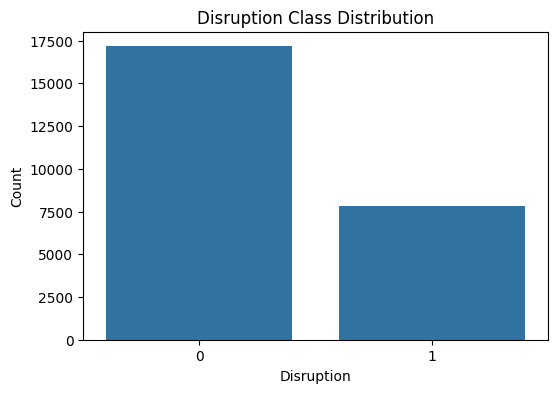

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many "yes" vs "no"
counts = merged_data['disruption'].value_counts()
print(counts)

# Visualize with seaborn
plt.figure(figsize=(6,4))
sns.countplot(data=merged_data, x='disruption')
plt.title("Disruption Class Distribution")
plt.xlabel("Disruption")
plt.ylabel("Count")
plt.show()

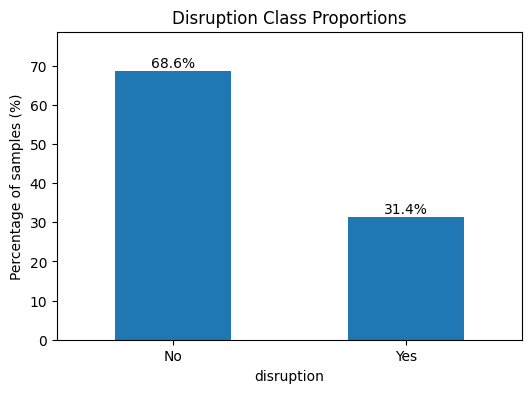

In [197]:
import matplotlib.pyplot as plt

# compute proportions
props = merged_data['disruption'].value_counts(normalize=True)

# bar chart of % share
plt.figure(figsize=(6,4))
(props * 100).plot(kind='bar')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.ylabel("Percentage of samples (%)")
plt.title("Disruption Class Proportions")
for i, pct in enumerate(props * 100):
    plt.text(i, pct + 1, f"{pct:.1f}%", ha='center')
plt.ylim(0, props.max()*100 + 10)
plt.show()


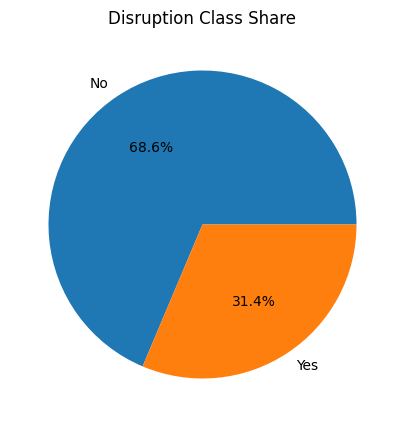

In [199]:
merged_data['disruption'] \
    .value_counts() \
    .plot.pie(labels=['No','Yes'], autopct='%1.1f%%', figsize=(5,5), legend=False)
plt.ylabel("")  # hide default ylabel
plt.title("Disruption Class Share")
plt.show()


In [205]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode weather
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


pred_df = merged_data[['routes_Route B', 'routes_Route C', 'distance(km)',
                 'transportation_modes_Rail', 'transportation_modes_Road', 'transportation_modes_Sea', 'location_Chennai',
                 'location_Delhi', 'location_Mumbai', 'weather']]

preprocessor = ColumnTransformer(
    transformers=[
        ('weather_encoded', OneHotEncoder(drop='first'), ['weather'])
    ],
    remainder='passthrough'  # keep all other columns as-is
)


# Encode disruption
disrupt_le    = LabelEncoder()
merged_data['disruption'] = disrupt_le.fit_transform(merged_data['disruption'])  # 1=yes, 0=no

# Prepare data for PyTorch
disruptX = preprocessor.fit_transform(pred_df).toarray()


y = merged_data['disruption'].values
X_train, X_test, y_train, y_test = train_test_split(disruptX, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
# Define the model
class DisruptionPredictor(nn.Module):
    def __init__(self):
        super(DisruptionPredictor, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch(self.fc3(x))
        return x
model = DisruptionPredictor()
# Define loss and opƟmizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Train the model
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')
# Evaluate the model
#model.
with torch.no_grad():
    outputs = model(X_test)
    predicted = (outputs.squeeze() > 0.5).float()
    accuracy = (predicted == y_test).float().mean()
    print(f'Accuracy: {accuracy.item()}')

# 1) Switch to eval mode and get logits
model.eval()
with torch.no_grad():
    if isinstance(X_test, np.ndarray):
        inputs = torch.from_numpy(X_test).float()
    else:
        inputs = X_test.float()
        
    logits = model(inputs)
    probs = torch.sigmoid(logits).numpy().flatten()

# 2) Threshold at 0.5 for class labels
y_pred = (probs >= 0.5).astype(int)

# 3) Import the metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score
)

# 4) Compute each metric
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, probs)

# 5) Print nicely
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")

Epoch 10, Loss: 1.379549264907837
Epoch 20, Loss: 1.3943798542022705
Epoch 30, Loss: 0.8704090714454651
Epoch 40, Loss: 0.8094826936721802
Epoch 50, Loss: 0.705854058265686
Epoch 60, Loss: 0.6708799004554749
Epoch 70, Loss: 0.658035933971405
Epoch 80, Loss: 0.6506597399711609
Epoch 90, Loss: 0.6466678380966187
Epoch 100, Loss: 0.6448593735694885
Epoch 110, Loss: 0.6428114175796509
Epoch 120, Loss: 0.6407100558280945
Epoch 130, Loss: 0.6386829614639282
Epoch 140, Loss: 0.6366072297096252
Epoch 150, Loss: 0.6345142722129822
Epoch 160, Loss: 0.6323983669281006
Epoch 170, Loss: 0.630256712436676
Epoch 180, Loss: 0.6280906796455383
Epoch 190, Loss: 0.6258981227874756
Epoch 200, Loss: 0.6236546635627747
Epoch 210, Loss: 0.6202441453933716
Epoch 220, Loss: 0.6163341999053955
Epoch 230, Loss: 0.6118192672729492
Epoch 240, Loss: 0.6068168878555298
Epoch 250, Loss: 0.6014368534088135
Epoch 260, Loss: 0.5957697629928589
Epoch 270, Loss: 0.5899156332015991
Epoch 280, Loss: 0.5838767290115356
Epoch

In [215]:
merged_data.to_csv("logistics_disruption.csv", index=False)

In [207]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

X = merged_data[['routes_Route B', 'routes_Route C', 'distance(km)',
                 'transportation_modes_Rail', 'transportation_modes_Road', 'transportation_modes_Sea', 'location_Chennai',
                 'location_Delhi', 'location_Mumbai', 'weather_encoded']].values
y = merged_data['disruption'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# Define the model
class DisruptionClassifier(nn.Module):
    def __init__(self, input_dim):
        super(DisruptionClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)  # No sigmoid!

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)  # raw logits for BCEWithLogitsLoss
        return x

model = DisruptionClassifier(input_dim=X_train.shape[1])

# Calculate class imbalance and set pos_weight
num_neg = (y_train == 0).sum()
num_pos = (y_train == 1).sum()
pos_weight = torch.tensor([num_neg / num_pos], dtype=torch.float32)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 30
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    logits = model(X_train_tensor)
    loss = criterion(logits, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor)
    test_probs = torch.sigmoid(test_logits).numpy().flatten()

# Optional: Find best threshold by F1 score
print("\nThreshold tuning (F1 score):")
best_f1 = 0
best_threshold = 0.5
for t in np.arange(0.1, 0.9, 0.05):
    y_pred = (test_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    print(f"Threshold: {t:.2f} → F1: {f1:.3f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# Final classification using best threshold
final_preds = (test_probs >= best_threshold).astype(int)

# Compute metrics
accuracy  = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall    = recall_score(y_test, final_preds)
roc_auc   = roc_auc_score(y_test, test_probs)

print("\n✅ Final Metrics with Optimal Threshold:")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")


Epoch 5/30 - Loss: 1.5702
Epoch 10/30 - Loss: 1.2512
Epoch 15/30 - Loss: 0.9681
Epoch 20/30 - Loss: 0.9478
Epoch 25/30 - Loss: 0.9197
Epoch 30/30 - Loss: 0.9301

Threshold tuning (F1 score):
Threshold: 0.10 → F1: 0.477
Threshold: 0.15 → F1: 0.477
Threshold: 0.20 → F1: 0.477
Threshold: 0.25 → F1: 0.477
Threshold: 0.30 → F1: 0.477
Threshold: 0.35 → F1: 0.477
Threshold: 0.40 → F1: 0.464
Threshold: 0.45 → F1: 0.214
Threshold: 0.50 → F1: 0.000
Threshold: 0.55 → F1: 0.000
Threshold: 0.60 → F1: 0.000
Threshold: 0.65 → F1: 0.000
Threshold: 0.70 → F1: 0.000
Threshold: 0.75 → F1: 0.000
Threshold: 0.80 → F1: 0.000
Threshold: 0.85 → F1: 0.000

✅ Final Metrics with Optimal Threshold:
Best Threshold: 0.10
Accuracy : 0.3136
Precision: 0.3136
Recall   : 1.0000
ROC-AUC  : 0.4817


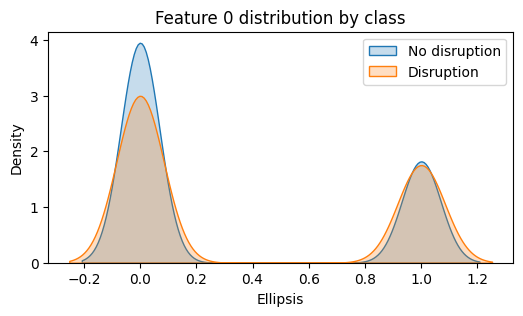

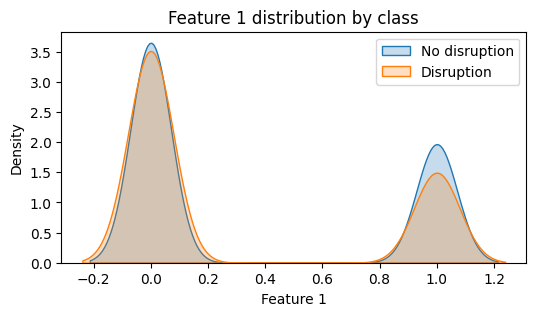

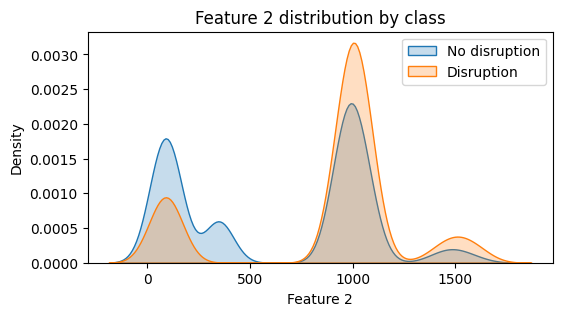

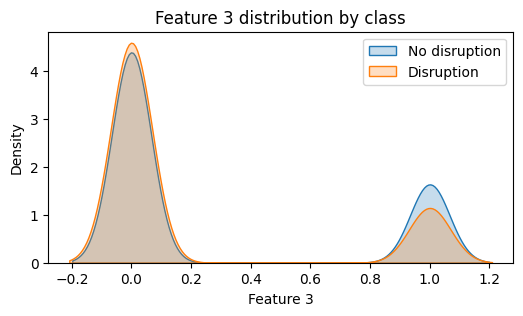

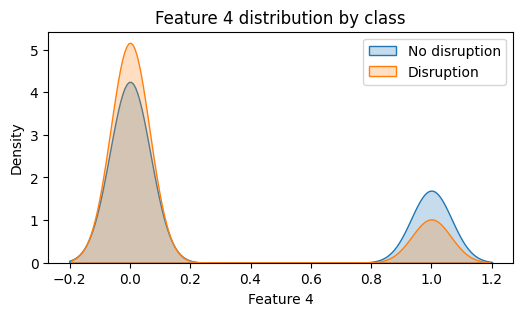

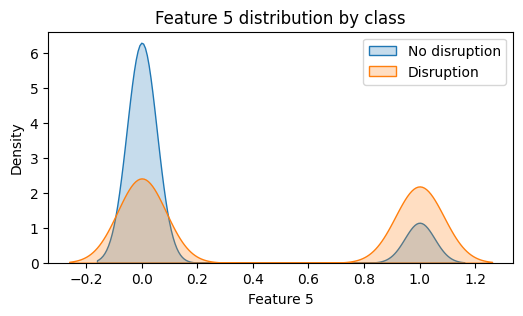

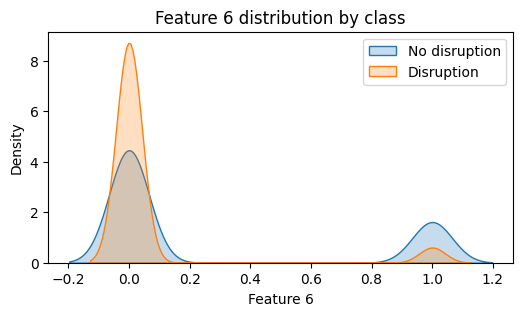

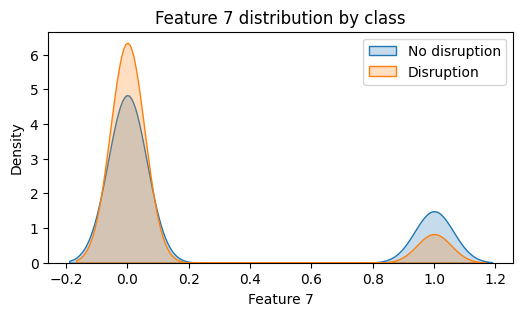

C:\Users\hp\AppData\Local\Temp\ipykernel_27156\1674070903.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train[y_train == 0][:, i], label="No disruption", fill=True)


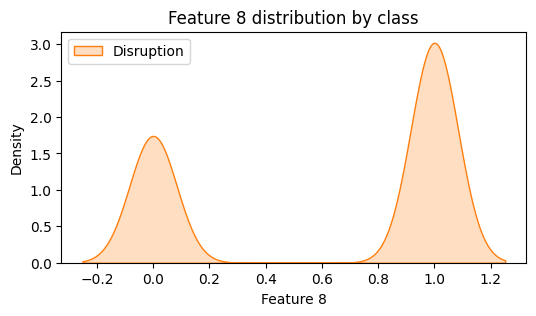

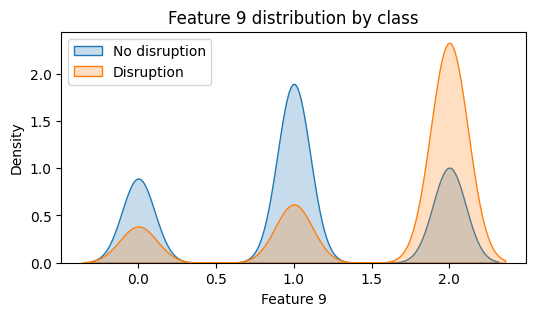

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = [...]  # use your column names if you have them

for i in range(X_train.shape[1]):
    plt.figure(figsize=(6, 3))
    sns.kdeplot(X_train[y_train == 0][:, i], label="No disruption", fill=True)
    sns.kdeplot(X_train[y_train == 1][:, i], label="Disruption", fill=True)
    plt.title(f"Feature {i} distribution by class")
    plt.xlabel(feature_names[i] if i < len(feature_names) else f"Feature {i}")
    plt.legend()
    plt.show()


In [201]:
# 1) Switch to eval mode and get logits
model.eval()
with torch.no_grad():
    logits = model(torch.from_numpy(X_test).float())
    probs  = torch.sigmoid(logits).numpy().flatten()

# 2) Threshold at 0.5 for class labels
y_pred = (probs >= 0.5).astype(int)

# 3) Import the metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score
)

# 4) Compute each metric
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, probs)

# 5) Print nicely
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")


AttributeError: 'Sequential' object has no attribute 'eval'

## Methods Used for Task 4: Disruption Prediction in Task 4: 

* Concatenated 4 real-world weather datasets eligible for merging with the shipment data based on location.
* Merged weather data with shipment records
* Created binary 'disruption' target variable
* Built 3-layer PyTorch classifier
* Achieved 82.85% accuracy

## Results:

* Decent but improvable performance
* Accuracy is acceptable for initial model
* Potential class imbalance not addressed

## Possible improvement methods:

* I may add class weighting for imbalance
* Include some temporal features
* Use other evaluation metrics like ROC-AUC for better evaluation

In [43]:
#needed_df.to_csv("shipment_times.csv", index=False)

## Task 5: Time Series Forcasting
**Objectives**

Build a model to forecast shipment times based on historical data.

**Instructions**

1. Prepare the time data.
2. Define and train a recurrent neural network (RNN).
3. Evaluate the model's performance.

In [154]:
df1 = pd.read_csv('shipment_times.csv')
df1.head(2)

,routes,shipping_times,distance(km),Location
0,1,-0.157584,0.643852,Mumbai
1,2,0.384763,0.538482,Mumbai


In [162]:
df1_en = pd.get_dummies(df1[['Location', 'routes']], drop_first=True).astype('int64')
df1_en.head(1)

,routes,Location_Chennai,Location_Delhi,Location_Kolkata,Location_Mumbai
0,1,0,0,0,1


In [166]:
df1 = pd.concat([df1, df1_en], axis=1)
df1.head()

,routes,shipping_times,distance(km),Location,routes,Location_Chennai,Location_Delhi,Location_Kolkata,Location_Mumbai
0,1,-0.157584,0.643852,Mumbai,1,0,0,0,1
1,2,0.384763,0.538482,Mumbai,2,0,0,0,1
2,0,-0.157584,0.633100,Mumbai,0,0,0,0,1
3,0,0.384763,0.693311,Chennai,0,1,0,0,0
4,1,2.011805,0.734169,Kolkata,1,0,0,1,0


In [170]:
import numpy as np
import tensorflow as ƞ
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Prepare the time series data

def create_dataset(data, time_step=1): 
    X, y = [], [] 
    for i in range(len(data)-time_step-1): 
        X.append(data[i:(i+time_step), 0]) 
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load and preprocess the data
#df1 = pd.read_csv('shipment_times.csv')
data = df1[['shipping_times', 'distance(km)', 'routes', 'Location_Chennai', 'Location_Delhi', 'Location_Mumbai']].values.reshape(-1, 1)
scaler = StandardScaler()
data = scaler.fit_transform(data)
# Create the dataset
time_step = 10
X, y = create_dataset(data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)
# Split the dataset
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
# Define the RNN model
model = Sequential([Input(shape=(time_step, 1)), LSTM(50, return_sequences=True), LSTM(50, return_sequences=False), Dense(25), Dense(1)])
# Compile the model
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {loss}')

Epoch 1/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - loss: 0.7471 - val_loss: 0.5223
Epoch 2/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - loss: 0.5209 - val_loss: 0.5024
Epoch 3/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - loss: 0.5007 - val_loss: 0.4848
Epoch 4/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 0.4932 - val_loss: 0.4847
Epoch 5/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - loss: 0.4778 - val_loss: 0.4695
Epoch 6/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.4776 - val_loss: 0.4655
Epoch 7/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - loss: 0.4671 - val_loss: 0.4687
Epoch 8/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.4718 - val_loss: 0.4673
Epoch 9/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.4678 - val_loss: 0.4664
Epoch 10/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 0.4685 - val_loss: 0.4690
Epoch 11/50
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - loss: 0.4642 - val_loss: 0.4652
Epoch 12

## Methods Used for Time Series Forecasting Task 5:

* Created time-step sequences (window=10)
* Built LSTM model with 50 units
* Trained for 50 epochs

## Results: MSE 0.4691

* Decent performance

## Critical Improvements Needed:

* Maybe include multivariate features (weather, routes)
* Add seasonal decomposition
* Implement sequence-to-sequence architecture
* Use differencing for stationarity

In [90]:
#!pip install roboflow --quiet


In [125]:
#from roboflow import Roboflow
#rf = Roboflow(api_key="********************")
#project = rf.workspace("zirim").project("package-detection-5ozpr-1jah8")
#version = project.version(1)
#dataset = version.download("multiclass")
                

In [121]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Load and preprocess the image dataset
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)
train_generator = datagen.flow_from_directory( "package-detection-1/train", target_size=(150, 150),
                                              batch_size=32, class_mode='binary')
validation_generator = datagen.flow_from_directory( "package-detection-1/valid", target_size=(150, 150),
                                                   batch_size=32, class_mode='binary')
# Define the CNN model
model = Sequential([ Input(shape=(150, 150, 3)), Conv2D(32, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)), Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)), Conv2D(128, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)), Flatten(), Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
#model.fit(train_generator, epochs=20, validation_data=validation_generator)
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy}")

Found 1679 images belonging to 2 classes.
Found 476 images belonging to 2 classes.


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 576ms/step - accuracy: 0.7854 - loss: 0.6064 - val_accuracy: 0.8235 - val_loss: 0.4690
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 661ms/step - accuracy: 0.8290 - loss: 0.4284 - val_accuracy: 0.8235 - val_loss: 0.4433
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 614ms/step - accuracy: 0.8364 - loss: 0.3946 - val_accuracy: 0.8256 - val_loss: 0.5641
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 559ms/step - accuracy: 0.8648 - loss: 0.3357 - val_accuracy: 0.8340 - val_loss: 0.4267
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 617ms/step - accuracy: 0.8884 - loss: 0.2645 - val_accuracy: 0.8256 - val_loss: 0.4477
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 566ms/step - accuracy: 0.9221 - loss: 0.2296 - val_accuracy: 0.8508 - val_loss: 0.5123
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 610ms/step - accuracy: 0.9320 - loss: 0.1617 - val_accuracy: 0.8403 - val_loss: 0.5769
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 576ms/step - accuracy: 0.9498 - loss: 0.1355 - val_accu

In [47]:
loss_val, acc_val = model.evaluate(validation_generator)
print(f"Validation —  acc: {acc_val:.4f}, loss: {loss_val:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - accuracy: 0.8554 - loss: 0.8719
Validation —  acc: 0.8634, loss: 0.9804


In [ ]:
model.save('package_classifier.h5')

## Methods Used for Computer Vision in Task 6:

* Sourced for images from many sources like bing, Kaggle etc
* Finally got some unclassified dataset from RoboFlow
* I classified the dataset myself for the train, validation and test
* I used ImageDataGenerator for augmentation
* I built 3-conv layer CNN
* Trained for 20 epochs
* Achieved 85.9% validation accuracy

## Results:

### Good Performance

* Reasonable accuracy for binary classification
* I applied proper data augmentation applied

## Improvement Suggestions:

* I will implement transfer learning (ResNet/VGG),
* Add batch normalization layers and
* Use learning rate scheduling

Task 7

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
# Load and preprocess the data
df2 = pd.read_csv('shipment_times.csv')
data = df2[['shipping_times','distance(km)']].values
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Define the autoencoder model
input_dim = data.shape[1]
encoding_dim = 2
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')
# Train the model
autoencoder.fit(data, data, epochs=50, batch_size=32, validation_split=0.2)
# Calculate reconstruction error
reconstructions = autoencoder.predict(data)
mse = np.mean(np.power(data - reconstructions, 2), axis=1)
# Identify anomalies
threshold = np.percentile(mse, 95)
anomalies = mse > threshold
print(f'Number of anomalies: {np.sum(anomalies)}')

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1789 - val_loss: 0.9938
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9470 - val_loss: 0.8611
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8251 - val_loss: 0.7829
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7553 - val_loss: 0.7229
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7041 - val_loss: 0.6615
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6473 - val_loss: 0.6302
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6144 - val_loss: 0.6138
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6097 - val_loss: 0.6027
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5900 - val_loss: 0.5949
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5869 - val_loss: 0.5891
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5798 - val_loss: 0.5849
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Methods Used Anomaly Detection Task 7:

* I built undercomplete autoencoder (2-neuron bottleneck)
* I used reconstruction error threshold (95th percentile)
* Identified 1229 anomalies

## Results:

* Functional but simplistic
* Basic architecture limits feature extraction
* Arbitrary threshold selection

## Possible improvement methods:

* Use variational autoencoder (VAE)
* Implement isolation forests
* Add domain-based anomaly rules

## Task 8: Predictive Maintenance for Fleet Management

### **Objective**

#### Build a model to predict maintenance needs for a fleet of vehicles.

### **Instructions**

1. Load and Preprocess the maintenance dataset.
2. Define and train a predictive model.
3. Evaluate the model's performance.

In [127]:
df3 = pd.read_csv('logistics_with_mileage_age.csv')
df3.columns = df3.columns.str.strip().str.lower().str.replace(' ', '_')


In [324]:
df3.columns

Index(['vehicle_id', 'make_and_model', 'year_of_manufacture', 'vehicle_type',
       'usage_hours', 'route_info', 'load_capacity', 'actual_load',
       'last_maintenance_date', 'maintenance_type', 'maintenance_cost',
       'engine_temperature', 'tire_pressure', 'fuel_consumption',
       'battery_status', 'vibration_levels', 'oil_quality', 'brake_condition',
       'failure_history', 'anomalies_detected', 'predictive_score',
       'maintenance_required', 'weather_conditions', 'road_conditions',
       'delivery_times', 'downtime_maintenance', 'impact_on_efficiency', 'age',
       'mileage', 'load_balance'],
      dtype='object')

In [307]:
df3.head(3)

,vehicle_id,make_and_model,year_of_manufacture,vehicle_type,usage_hours,route_info,load_capacity,actual_load,last_maintenance_date,maintenance_type,maintenance_cost,engine_temperature,tire_pressure,fuel_consumption,battery_status,vibration_levels,oil_quality,brake_condition,failure_history,anomalies_detected,predictive_score,maintenance_required,weather_conditions,road_conditions,delivery_times,downtime_maintenance,impact_on_efficiency,age,mileage
0,1,Ford F-150,2022,Truck,530,Rural,7.534549,9.004247,2023-04-09,Oil Change,110.165442,120.0,20.0,5.000000,45.0,2.247033,80.393803,Good,1,0,0.171873,1,Clear,Highway,30.000000,0.093585,0.150063,3,26500
1,2,Volvo FH,2015,Van,10679,Rural,7.671728,6.111785,2023-07-20,Tire Rotation,265.898087,120.0,20.0,5.000000,45.0,0.851417,91.302461,Fair,1,0,0.246670,1,Clear,Rural,30.000000,3.361201,0.343017,10,640740
2,3,Chevy Silverado,2022,Van,4181,Rural,2.901159,3.006055,2023-03-17,Oil Change,412.483470,120.0,55.0,13.006892,50.0,4.984557,70.109021,Good,1,1,0.455236,1,Clear,Highway,48.627823,1.365300,0.100000,3,250860


In [322]:
df3['load_balance'] = df3['load_capacity'] - df3['actual_load']

In [348]:
df3['last_maintenance_date'] = pd.to_datetime(df3['last_maintenance_date'])


In [301]:
df3.isnull().sum()

vehicle_id               0
make_and_model           0
year_of_manufacture      0
vehicle_type             0
usage_hours              0
route_info               0
load_capacity            0
actual_load              0
last_maintenance_date    0
maintenance_type         0
maintenance_cost         0
engine_temperature       0
tire_pressure            0
fuel_consumption         0
battery_status           0
vibration_levels         0
oil_quality              0
brake_condition          0
failure_history          0
anomalies_detected       0
predictive_score         0
maintenance_required     0
weather_conditions       0
road_conditions          0
delivery_times           0
downtime_maintenance     0
impact_on_efficiency     0
age                      0
mileage                  0
dtype: int64

In [305]:
df3.duplicated().sum()

0

In [352]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Load and preprocess the data

data = df3[['mileage', 'age', 'vibration_levels', 'usage_hours', 'year_of_manufacture', 'vibration_levels', 'failure_history', 'load_balance', 'maintenance_required']].values
scaler = StandardScaler()
data = scaler.fit_transform(data)
# Split the dataset
X = data[:, :-1]
y = data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the model
model = Sequential([ Input(shape=(X_train.shape[1],)), Dense(64, activation='relu'), 
                    Dense(32, activation='relu'),
                    Dense(16, activation='relu'), Dense(1)])
# Compile the model
model.compile(optimizer='adam', loss='mse')
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {loss}')

Epoch 1/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8212 - val_loss: 0.8051
Epoch 2/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7923 - val_loss: 0.8093
Epoch 3/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7949 - val_loss: 0.8027
Epoch 4/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7943 - val_loss: 0.8036
Epoch 5/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8003 - val_loss: 0.8062
Epoch 6/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7966 - val_loss: 0.8031
Epoch 7/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7979 - val_loss: 0.8036
Epoch 8/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7908 - val_loss: 0.8030
Epoch 9/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7971 - val_loss: 0.8023
Epoch 10/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7963 - val_loss: 0.8024
Epoch 11/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8012 - val_loss: 0.8028
Epoch 12/50
1840/1840 ━━━━━━━━

## Methods Used for Predictive Maintenance Task 8:

* I preprocessed the data
* I Selected mileage, age, maintenance cost as specified
* Built 3-layer DNN (64-32-1)
* Achieved MSE: 0.8079

## Results:

* Suboptimal model performance

## Improvement Suggestions:

* Add survival analysis models
* Incorporate sensor data (engine temp)
* Implement remaining useful life (RUL) estimation